In [1]:
import spacy
import en_core_web_sm
import pandas as pd
import spacytextblob.spacytextblob as spacytextblob
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import glob

dataframes = []
jsonfiles = glob.glob('/Users/User/Downloads/Data_Reddit_Comments/opiates_comments*.json')

for file in jsonfiles:
    temp = pd.read_json(file)
    dataframes.append(temp)

df = pd.concat(dataframes, ignore_index=True)

display(df.head())

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

nlp.select_pipes(disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])



,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,editable,steward_reports,updated_utc,author_created_utc,nest_level,reply_delay,user_removed,mod_removed,rte_mode,permalink_url
0,[],False,NaN,sumuroy,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,NaN,OG-Droppa,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,NaN,buick916,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,NaN,dioblohunter,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,NaN,Otherwise-Finger-161,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [4]:

df = df.loc[(df['body'] != '') & (df['body'] != '[deleted]') & (df['body'] != '[removed]') & (df['author'] != '[deleted]')]
df = df.dropna(subset=['body']).reset_index(drop=True)
df.reset_index(inplace=True, drop=True)

display(df.head())
display(df['body'])

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,editable,steward_reports,updated_utc,author_created_utc,nest_level,reply_delay,user_removed,mod_removed,rte_mode,permalink_url
0,[],False,NaN,sumuroy,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,NaN,OG-Droppa,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,NaN,buick916,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,NaN,dioblohunter,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,NaN,Otherwise-Finger-161,None,None,[],None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0          Well I would have to agree with you. That was ...
1                         You’re in a better place now dog 💯
2          I feel like a bad mood/mindset/situation can d...
3          If it's pure diamorphine then it is possible b...
4          I don’t seem to be getting high and when I run...
                                 ...                        
3762440                              057 upside down was LSD
3762441    I used with my cousin too. PM me as well if yo...
3762442    I actually just posted about this on a differe...
3762443         B ready for anything n dbtgs plan could work
3762444    Dude, if you're doing percs every day, even 10...
Name: body, Length: 3762445, dtype: object

In [5]:
results = []

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    text = row['body']
    blob = nlp(text)._.blob
    results.append(blob)

    # Print the status by overwriting the same row
    status = f"Processing row {index + 1} out of {len(df)}"
    print(status, end='\r')  # The end='\r' overwrites the same line in the console

# Add the results as a new column in the DataFrame
df['blob'] = results

df['polarity'] = df['blob'].apply(lambda blob: blob.polarity)
df['subjectivity'] = df['blob'].apply(lambda blob: blob.subjectivity)

df['formatted_date'] = df['created_utc'].apply(lambda date: datetime.datetime.fromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S'))
df['month'] = df['formatted_date'].apply(lambda date: date.split('-')[1])
df['year'] = df['formatted_date'].apply(lambda date: date.split('-')[0])

In [19]:
display(df['polarity'].describe())
display(df['subjectivity'].describe())

display(df)



count    871.000000
mean       0.089204
std        0.248253
min       -1.000000
25%        0.000000
50%        0.032391
75%        0.209594
max        1.000000
Name: polarity, dtype: float64

count    871.000000
mean       0.436848
std        0.275630
min        0.000000
25%        0.250000
50%        0.500000
75%        0.605000
max        1.000000
Name: subjectivity, dtype: float64

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,...,subreddit_id,created,user_removed,edited,blob,polarity,subjectivity,formatted_date,month,year
0,ENRICOs,1.212326e+09,None,None,t2_35s46,Wrong. Loperamide is an analog of meperidine (...,0,1308887031,None,0,...,t5_2r0y3,1308901431,NaN,NaN,"(W, r, o, n, g, ., , L, o, p, e, r, a, m, i, ...",0.106736,0.424861,2011-06-23 23:43:51,06,2011
1,[deleted],NaN,None,None,None,at bonnaroo. it smelled like flowers but I did...,0,1308881233,None,0,...,t5_2r0y3,1308895633,NaN,NaN,"(a, t, , b, o, n, n, a, r, o, o, ., , i, t, ...",0.160000,0.540000,2011-06-23 22:07:13,06,2011
2,nvrwastetree,1.291778e+09,,Buprenorphine,t2_4lj4t,Lol methadone....abiet old school??,0,1308877576,None,0,...,t5_2r0y3,1308891976,NaN,NaN,"(L, o, l, , m, e, t, h, a, d, o, n, e, ., ., ...",0.450000,0.450000,2011-06-23 21:06:16,06,2011
3,ttd,1.298605e+09,None,None,t2_4w05s,Immodium (loperamide) does in fact have activi...,0,1308861650,None,0,...,t5_2r0y3,1308876050,NaN,NaN,"(I, m, m, o, d, i, u, m, , (, l, o, p, e, r, ...",0.152051,0.613974,2011-06-23 16:40:50,06,2011
4,nvrwastetree,1.291778e+09,,Buprenorphine,t2_4lj4t,Heard of this as well...,0,1308854583,None,0,...,t5_2r0y3,1308868983,NaN,NaN,"(H, e, a, r, d, , o, f, , t, h, i, s, , a, ...",0.000000,0.000000,2011-06-23 14:43:03,06,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,ihateopiates,1.293993e+09,None,None,t2_4ogv1,"IIRC, he was. I can remember him being old. Li...",0,1293996787,None,0,...,t5_2r0y3,1294011187,NaN,NaN,"(I, I, R, C, ,, , h, e, , w, a, s, ., , I, ...",0.150000,0.350000,2011-01-02 14:33:07,01,2011
867,[deleted],NaN,None,None,None,Good luck! Child doctor sounds like an asshole.,0,1293996472,None,0,...,t5_2r0y3,1294010872,NaN,NaN,"(G, o, o, d, , l, u, c, k, !, , C, h, i, l, ...",0.875000,0.600000,2011-01-02 14:27:52,01,2011
868,JKinney,1.280660e+09,None,None,t2_481ft,I used to shoot 150mg of oxycodone at once and...,0,1293927708,None,0,...,t5_2r0y3,1293942108,NaN,NaN,"(I, , u, s, e, d, , t, o, , s, h, o, o, t, ...",0.119500,0.393000,2011-01-01 19:21:48,01,2011
869,enthreeoh,1.290829e+09,,Learn to swim,t2_4k6fz,Weight has no bearing on drugs that target you...,0,1293868861,None,0,...,t5_2r0y3,1293883261,NaN,NaN,"(W, e, i, g, h, t, , h, a, s, , n, o, , b, ...",0.283333,0.479167,2011-01-01 03:01:01,01,2011


In [20]:
df_grouped = df.groupby(lambda x: df['month'][x])

for month, group in df_grouped:
    display(group)
    display(group['polarity'].describe())



,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,...,subreddit_id,created,user_removed,edited,blob,polarity,subjectivity,formatted_date,month,year
754,[deleted],NaN,None,None,None,"First of all, putting things up your ass is wo...",0,1296452268,None,0,...,t5_2r0y3,1296466668,NaN,NaN,"(F, i, r, s, t, , o, f, , a, l, l, ,, , p, ...",0.400000,0.644444,2011-01-31 00:37:48,01,2011
755,[deleted],NaN,None,None,None,Good SHit,0,1296451613,None,0,...,t5_2r0y3,1296466013,NaN,NaN,"(G, o, o, d, , S, H, i, t)",0.250000,0.700000,2011-01-31 00:26:53,01,2011
756,[deleted],NaN,None,None,None,"A Setting Sun is great, their song Sunshine Mi...",0,1296451604,None,0,...,t5_2r0y3,1296466004,NaN,NaN,"(A, , S, e, t, t, i, n, g, , S, u, n, , i, ...",0.366667,0.550000,2011-01-31 00:26:44,01,2011
757,[deleted],NaN,None,None,None,Hydromorphone!! 2mg once in a blue moon puts m...,0,1296437937,None,0,...,t5_2r0y3,1296452337,NaN,NaN,"(H, y, d, r, o, m, o, r, p, h, o, n, e, !, !, ...",0.000000,0.100000,2011-01-30 20:38:57,01,2011
758,orangesunshine,1.224988e+09,None,None,t2_3a1la,"Yeah, I'm such an ass with my phd in psycholog...",0,1296418413,None,0,...,t5_2r0y3,1296432813,NaN,NaN,"(Y, e, a, h, ,, , I, ', m, , s, u, c, h, , ...",0.000000,0.500000,2011-01-30 15:13:33,01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,ihateopiates,1.293993e+09,None,None,t2_4ogv1,"IIRC, he was. I can remember him being old. Li...",0,1293996787,None,0,...,t5_2r0y3,1294011187,NaN,NaN,"(I, I, R, C, ,, , h, e, , w, a, s, ., , I, ...",0.150000,0.350000,2011-01-02 14:33:07,01,2011
867,[deleted],NaN,None,None,None,Good luck! Child doctor sounds like an asshole.,0,1293996472,None,0,...,t5_2r0y3,1294010872,NaN,NaN,"(G, o, o, d, , l, u, c, k, !, , C, h, i, l, ...",0.875000,0.600000,2011-01-02 14:27:52,01,2011
868,JKinney,1.280660e+09,None,None,t2_481ft,I used to shoot 150mg of oxycodone at once and...,0,1293927708,None,0,...,t5_2r0y3,1293942108,NaN,NaN,"(I, , u, s, e, d, , t, o, , s, h, o, o, t, ...",0.119500,0.393000,2011-01-01 19:21:48,01,2011
869,enthreeoh,1.290829e+09,,Learn to swim,t2_4k6fz,Weight has no bearing on drugs that target you...,0,1293868861,None,0,...,t5_2r0y3,1293883261,NaN,NaN,"(W, e, i, g, h, t, , h, a, s, , n, o, , b, ...",0.283333,0.479167,2011-01-01 03:01:01,01,2011


count    117.000000
mean       0.069340
std        0.265704
min       -0.725000
25%       -0.010000
50%        0.006250
75%        0.175114
max        1.000000
Name: polarity, dtype: float64

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,...,subreddit_id,created,user_removed,edited,blob,polarity,subjectivity,formatted_date,month,year
638,1025pwr,1.261272e+09,,Heroin,t2_3s5nc,I'm not really sure. Stupid? Yes. Dangerous? Y...,0,1298954041,None,0,...,t5_2r0y3,1298968441,NaN,NaN,"(I, ', m, , n, o, t, , r, e, a, l, l, y, , ...",7.142857e-04,0.587098,2011-02-28 23:34:01,02,2011
639,wrong_joke_explainer,1.293640e+09,None,None,t2_4o098,Wait do you consider not breathing good or bad...,0,1298952969,None,0,...,t5_2r0y3,1298967369,NaN,NaN,"(W, a, i, t, , d, o, , y, o, u, , c, o, n, ...",5.551115e-17,0.633333,2011-02-28 23:16:09,02,2011
640,DrOOpieS,1.217392e+09,,Hydrocodone,t2_37gtc,Can someone give me some insight on how to acq...,0,1298949481,None,0,...,t5_2r0y3,1298963881,NaN,NaN,"(C, a, n, , s, o, m, e, o, n, e, , g, i, v, ...",0.000000e+00,0.000000,2011-02-28 22:18:01,02,2011
641,o_g,1.236737e+09,,Sobriety,t2_3eofj,"I don't think so, but good luck getting any le...",0,1298943546,None,0,...,t5_2r0y3,1298957946,NaN,NaN,"(I, , d, o, n, ', t, , t, h, i, n, k, , s, ...",2.285714e-01,0.542857,2011-02-28 20:39:06,02,2011
642,enthreeoh,1.290829e+09,,Learn to swim,t2_4k6fz,Would it be against the rules to ask where to ...,0,1298939896,None,0,...,t5_2r0y3,1298954296,NaN,NaN,"(W, o, u, l, d, , i, t, , b, e, , a, g, a, ...",-2.500000e-01,0.888889,2011-02-28 19:38:16,02,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,charbo187,1.162330e+09,oneup,dope,t2_onyi,ya know you could probably turn that around fo...,0,1296575045,None,0,...,t5_2r0y3,1296589445,NaN,NaN,"(y, a, , k, n, o, w, , y, o, u, , c, o, u, ...",3.416667e-01,0.916667,2011-02-01 10:44:05,02,2011
750,charbo187,1.162330e+09,oneup,dope,t2_onyi,tell me what H is like please.,0,1296573333,None,0,...,t5_2r0y3,1296587733,NaN,NaN,"(t, e, l, l, , m, e, , w, h, a, t, , H, , ...",0.000000e+00,0.000000,2011-02-01 10:15:33,02,2011
751,charbo187,1.162330e+09,oneup,dope,t2_onyi,well if they aren't taking them you can't real...,0,1296573250,None,0,...,t5_2r0y3,1296587650,NaN,NaN,"(w, e, l, l, , i, f, , t, h, e, y, , a, r, ...",-2.000000e-01,0.400000,2011-02-01 10:14:10,02,2011
752,charbo187,1.162330e+09,oneup,dope,t2_onyi,it's tough living in the northern hemisphere man.,0,1296573087,None,0,...,t5_2r0y3,1296587487,NaN,NaN,"(i, t, ', s, , t, o, u, g, h, , l, i, v, i, ...",-3.888889e-01,0.833333,2011-02-01 10:11:27,02,2011


count    1.160000e+02
mean     7.778882e-02
std      2.110516e-01
min     -6.250000e-01
25%      0.000000e+00
50%      2.775558e-17
75%      2.126623e-01
max      7.000000e-01
Name: polarity, dtype: float64

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,...,subreddit_id,created,user_removed,edited,blob,polarity,subjectivity,formatted_date,month,year
399,enthreeoh,1.290829e+09,,Learn to swim,t2_4k6fz,I felt the same way but they just don't do it ...,0,1301615583,None,0,...,t5_2r0y3,1301629983,NaN,NaN,"(I, , f, e, l, t, , t, h, e, , s, a, m, e, ...",-0.020139,0.365377,2011-03-31 19:53:03,03,2011
400,enthreeoh,1.290829e+09,,Learn to swim,t2_4k6fz,Yeah it's horrible. I sustained the injury in ...,0,1301615345,None,0,...,t5_2r0y3,1301629745,NaN,NaN,"(Y, e, a, h, , i, t, ', s, , h, o, r, r, i, ...",0.000000,0.662500,2011-03-31 19:49:05,03,2011
401,ENRICOs,1.212326e+09,None,None,t2_35s46,With extensive documentation (that can be read...,0,1301615285,None,0,...,t5_2r0y3,1301629685,NaN,NaN,"(W, i, t, h, , e, x, t, e, n, s, i, v, e, , ...",0.175000,0.355556,2011-03-31 19:48:05,03,2011
402,enthreeoh,1.290829e+09,,Learn to swim,t2_4k6fz,"Well, so far I've tried a regular family docto...",0,1301609595,None,0,...,t5_2r0y3,1301623995,NaN,NaN,"(W, e, l, l, ,, , s, o, , f, a, r, , I, ', ...",0.070455,0.311538,2011-03-31 18:13:15,03,2011
403,[deleted],NaN,None,None,None,Your comments read like a bad after-school spe...,0,1301604565,None,0,...,t5_2r0y3,1301618965,NaN,NaN,"(Y, o, u, r, , c, o, m, m, e, n, t, s, , r, ...",-0.171429,0.619048,2011-03-31 16:49:25,03,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,jmone,1.225410e+09,None,None,t2_3a70w,I've heard similar things about other stimulan...,0,1299040255,None,0,...,t5_2r0y3,1299054655,NaN,NaN,"(I, ', v, e, , h, e, a, r, d, , s, i, m, i, ...",-0.041667,0.425000,2011-03-01 23:30:55,03,2011
634,asenz,1.201341e+09,None,None,t2_32rx7,What you probably really need is L-Dopa.,0,1299015435,None,0,...,t5_2r0y3,1299029835,NaN,NaN,"(W, h, a, t, , y, o, u, , p, r, o, b, a, b, ...",0.200000,0.200000,2011-03-01 16:37:15,03,2011
635,1025pwr,1.261272e+09,,Heroin,t2_3s5nc,Hydromorphone (Dilaudid) and Oxymorphone (Opan...,0,1298998926,None,0,...,t5_2r0y3,1299013326,NaN,NaN,"(H, y, d, r, o, m, o, r, p, h, o, n, e, , (, ...",-0.103125,0.546875,2011-03-01 12:02:06,03,2011
636,enthreeoh,1.290829e+09,,Learn to swim,t2_4k6fz,"Never heard of this before, sounds promising.",0,1298992901,None,0,...,t5_2r0y3,1299007301,NaN,NaN,"(N, e, v, e, r, , h, e, a, r, d, , o, f, , ...",0.200000,0.500000,2011-03-01 10:21:41,03,2011


count    239.000000
mean       0.083222
std        0.268977
min       -1.000000
25%       -0.019236
50%        0.026786
75%        0.207552
max        1.000000
Name: polarity, dtype: float64

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,...,subreddit_id,created,user_removed,edited,blob,polarity,subjectivity,formatted_date,month,year
277,genericwit,1.292226e+09,None,None,t2_4m5bd,"If it's been too long they won't refill it, es...",0,1304109734,None,0,...,t5_2r0y3,1304124134,NaN,NaN,"(I, f, , i, t, ', s, , b, e, e, n, , t, o, ...",-0.033333,0.594444,2011-04-29 16:42:14,04,2011
278,Farva603,1.220215e+09,,Roxicodone/Fentanyl,t2_38cd1,I am not sure if all the pain meds will have t...,0,1304102347,None,0,...,t5_2r0y3,1304116747,NaN,NaN,"(I, , a, m, , n, o, t, , s, u, r, e, , i, ...",-0.022222,0.539683,2011-04-29 14:39:07,04,2011
279,Farva603,1.220215e+09,,Roxicodone/Fentanyl,t2_38cd1,If i remember modifinal is generic name for Pr...,0,1304102190,None,0,...,t5_2r0y3,1304116590,NaN,NaN,"(I, f, , i, , r, e, m, e, m, b, e, r, , m, ...",0.170130,0.397403,2011-04-29 14:36:30,04,2011
280,Farva603,1.220215e+09,,Roxicodone/Fentanyl,t2_38cd1,"True, hydrocodone is not as strong as oxycodon...",0,1304100533,None,0,...,t5_2r0y3,1304114933,NaN,NaN,"(T, r, u, e, ,, , h, y, d, r, o, c, o, d, o, ...",0.405556,0.738889,2011-04-29 14:08:53,04,2011
281,[deleted],NaN,None,None,None,"also, is it easy to take the boat to tangier? ...",0,1304057810,None,0,...,t5_2r0y3,1304072210,NaN,NaN,"(a, l, s, o, ,, , i, s, , i, t, , e, a, s, ...",0.433333,0.833333,2011-04-29 02:16:50,04,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,p0lecat,1.298571e+09,,Morphine,t2_4vxh2,you'll lose some potency by not taking them su...,0,1301661663,None,0,...,t5_2r0y3,1301676063,NaN,NaN,"(y, o, u, ', l, l, , l, o, s, e, , s, o, m, ...",-0.175000,0.666667,2011-04-01 08:41:03,04,2011
395,ExOblivion,1.287034e+09,,Drugstore Cowboy,t2_4ffm9,You're welcome!,0,1301645592,None,0,...,t5_2r0y3,1301659992,NaN,NaN,"(Y, o, u, ', r, e, , w, e, l, c, o, m, e, !)",1.000000,0.900000,2011-04-01 04:13:12,04,2011
396,[deleted],NaN,None,None,None,"Y-s, b-caus- addiction has chang-d so much in ...",0,1301641244,None,0,...,t5_2r0y3,1301655644,NaN,NaN,"(Y, -, s, ,, , b, -, c, a, u, s, -, , a, d, ...",-0.425000,0.525000,2011-04-01 03:00:44,04,2011
397,[deleted],NaN,None,None,None,"Just to b- saf-, bring th-m to th- pharmacy in...",0,1301640624,None,0,...,t5_2r0y3,1301655024,NaN,NaN,"(J, u, s, t, , t, o, , b, -, , s, a, f, -, ...",-0.425000,0.600000,2011-04-01 02:50:24,04,2011


count    122.000000
mean       0.099544
std        0.273253
min       -0.750000
25%       -0.001799
50%        0.048679
75%        0.200000
max        1.000000
Name: polarity, dtype: float64

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,...,subreddit_id,created,user_removed,edited,blob,polarity,subjectivity,formatted_date,month,year
95,enthreeoh,1.290829e+09,,Learn to swim,t2_4k6fz,I'm confused about what you're trying to accom...,0,1306896741,None,0,...,t5_2r0y3,1306911141,NaN,NaN,"(I, ', m, , c, o, n, f, u, s, e, d, , a, b, ...",-0.007840,0.520090,2011-05-31 22:52:21,05,2011
96,thefalloftroy,1.266870e+09,None,None,t2_3wgo2,did you take it before or after knowledge of t...,0,1306891363,None,0,...,t5_2r0y3,1306905763,NaN,NaN,"(d, i, d, , y, o, u, , t, a, k, e, , i, t, ...",0.000000,0.000000,2011-05-31 21:22:43,05,2011
97,thefalloftroy,1.266870e+09,None,None,t2_3wgo2,if you get some opium poppies (most gardening ...,0,1306891289,None,0,...,t5_2r0y3,1306905689,NaN,NaN,"(i, f, , y, o, u, , g, e, t, , s, o, m, e, ...",0.300828,0.638000,2011-05-31 21:21:29,05,2011
98,nvrwastetree,1.291778e+09,,Buprenorphine,t2_4lj4t,also have a ton of 5 mg valium as well.,0,1306888562,None,0,...,t5_2r0y3,1306902962,NaN,NaN,"(a, l, s, o, , h, a, v, e, , a, , t, o, n, ...",0.000000,0.000000,2011-05-31 20:36:02,05,2011
99,nvrwastetree,1.291778e+09,,Buprenorphine,t2_4lj4t,Or you could fly to Miami and go to a street c...,0,1306887673,None,0,...,t5_2r0y3,1306902073,NaN,NaN,"(O, r, , y, o, u, , c, o, u, l, d, , f, l, ...",0.800000,0.900000,2011-05-31 20:21:13,05,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,[deleted],NaN,None,None,None,"Ah yea, that clonazepam would definitely get y...",0,1304285971,None,0,...,t5_2r0y3,1304300371,NaN,NaN,"(A, h, , y, e, a, ,, , t, h, a, t, , c, l, ...",0.175000,0.575000,2011-05-01 17:39:31,05,2011
273,nearjat,1.303791e+09,None,None,t2_55c03,"Ya know at the same time I ""stumbled"" on a bot...",0,1304285568,None,0,...,t5_2r0y3,1304299968,NaN,NaN,"(Y, a, , k, n, o, w, , a, t, , t, h, e, , ...",0.055000,0.580000,2011-05-01 17:32:48,05,2011
274,[deleted],NaN,None,None,None,"Interesting, whats the sub high like?",0,1304284625,None,0,...,t5_2r0y3,1304299025,NaN,NaN,"(I, n, t, e, r, e, s, t, i, n, g, ,, , w, h, ...",0.330000,0.520000,2011-05-01 17:17:05,05,2011
275,nearjat,1.303791e+09,None,None,t2_55c03,Yeah one time I stumbled on a bottle of 8mg li...,0,1304264986,None,0,...,t5_2r0y3,1304279386,NaN,NaN,"(Y, e, a, h, , o, n, e, , t, i, m, e, , I, ...",0.171991,0.548148,2011-05-01 11:49:46,05,2011


count    182.000000
mean       0.095885
std        0.231700
min       -1.000000
25%        0.000000
50%        0.035367
75%        0.211932
max        1.000000
Name: polarity, dtype: float64

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,body,controversiality,created_utc,distinguished,gilded,...,subreddit_id,created,user_removed,edited,blob,polarity,subjectivity,formatted_date,month,year
0,ENRICOs,1.212326e+09,None,None,t2_35s46,Wrong. Loperamide is an analog of meperidine (...,0,1308887031,None,0,...,t5_2r0y3,1308901431,NaN,NaN,"(W, r, o, n, g, ., , L, o, p, e, r, a, m, i, ...",0.106736,0.424861,2011-06-23 23:43:51,06,2011
1,[deleted],NaN,None,None,None,at bonnaroo. it smelled like flowers but I did...,0,1308881233,None,0,...,t5_2r0y3,1308895633,NaN,NaN,"(a, t, , b, o, n, n, a, r, o, o, ., , i, t, ...",0.160000,0.540000,2011-06-23 22:07:13,06,2011
2,nvrwastetree,1.291778e+09,,Buprenorphine,t2_4lj4t,Lol methadone....abiet old school??,0,1308877576,None,0,...,t5_2r0y3,1308891976,NaN,NaN,"(L, o, l, , m, e, t, h, a, d, o, n, e, ., ., ...",0.450000,0.450000,2011-06-23 21:06:16,06,2011
3,ttd,1.298605e+09,None,None,t2_4w05s,Immodium (loperamide) does in fact have activi...,0,1308861650,None,0,...,t5_2r0y3,1308876050,NaN,NaN,"(I, m, m, o, d, i, u, m, , (, l, o, p, e, r, ...",0.152051,0.613974,2011-06-23 16:40:50,06,2011
4,nvrwastetree,1.291778e+09,,Buprenorphine,t2_4lj4t,Heard of this as well...,0,1308854583,None,0,...,t5_2r0y3,1308868983,NaN,NaN,"(H, e, a, r, d, , o, f, , t, h, i, s, , a, ...",0.000000,0.000000,2011-06-23 14:43:03,06,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,nvrwastetree,1.291778e+09,,Buprenorphine,t2_4lj4t,I know tapering down means taking less; im not...,0,1306946175,None,0,...,t5_2r0y3,1306960575,NaN,NaN,"(I, , k, n, o, w, , t, a, p, e, r, i, n, g, ...",-0.107407,0.160185,2011-06-01 12:36:15,06,2011
91,AudiQuattoLover,1.304540e+09,None,None,t2_56wnf,Update. 43 days today still have a strong desi...,0,1306945380,None,0,...,t5_2r0y3,1306959780,NaN,NaN,"(U, p, d, a, t, e, ., , 4, 3, , d, a, y, s, ...",0.174561,0.477047,2011-06-01 12:23:00,06,2011
92,alshhi,1.196721e+09,None,None,t2_31nsy,"was visiting friends in Cali last week, got s...",0,1306940751,None,0,...,t5_2r0y3,1306955151,NaN,NaN,"(w, a, s, , v, i, s, i, t, i, n, g, , f, r, ...",-0.083333,0.522222,2011-06-01 11:05:51,06,2011
93,enthreeoh,1.290829e+09,,Learn to swim,t2_4k6fz,Did you read what I wrote? Taper means take le...,0,1306935174,None,0,...,t5_2r0y3,1306949574,NaN,NaN,"(D, i, d, , y, o, u, , r, e, a, d, , w, h, ...",-0.125000,0.081250,2011-06-01 09:32:54,06,2011


count    95.000000
mean      0.116575
std       0.210699
min      -0.608333
25%       0.000000
50%       0.104667
75%       0.232917
max       0.683333
Name: polarity, dtype: float64

In [21]:
df_commenters = df.groupby('author').agg({'polarity': ['mean', 'count']})

df_commenters = df_commenters[df_commenters['polarity']['count'] > 5]

df_commenters = df_commenters.sort_values(('polarity', 'mean'), ascending=False)

display(df_commenters)

polarity      
                          mean count
author                              
nearjat               0.263490    13
DrOOpieS              0.225744     8
punchednthenose       0.213199     6
SuckMyOpiate          0.211199     9
platinum4             0.208783     9
ExOblivion            0.202406     6
TinyPupilsee          0.188334     7
InterficioScientia    0.178364     7
genericwit            0.158765    16
dopafiend             0.140741     6
[deleted]             0.135814   176
terqui                0.132750    29
SnuggleBear           0.127717    13
fleeting              0.112202     9
wrong_joke_explainer  0.109766     9
o_g                   0.093877    15
Farva603              0.063959     9
drugs_r_my_food       0.050076    12
1025pwr               0.045889     8
mattbromans           0.043750     8
jmone                 0.040995    14
enthreeoh             0.040135    52
eXiled                0.034288    16
nvrwastetree          0.030548    18
JKinney               0.023077    18
DevoretOpiate         0.018438    24
Hyperdrive_Initiated  0.014688     6
AudiQuattoLover       0.011611     8
jmkogut               0.007212    13
drknight             -0.002347     7
threwahway           -0.005886     7
charbo187            -0.020177    10
ENRICOs              -0.021659    11
bakinator420         -0.026190     7
BioQuark             -0.089702     7

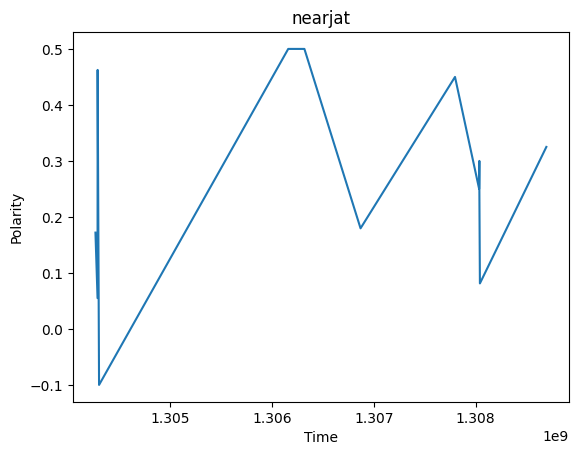

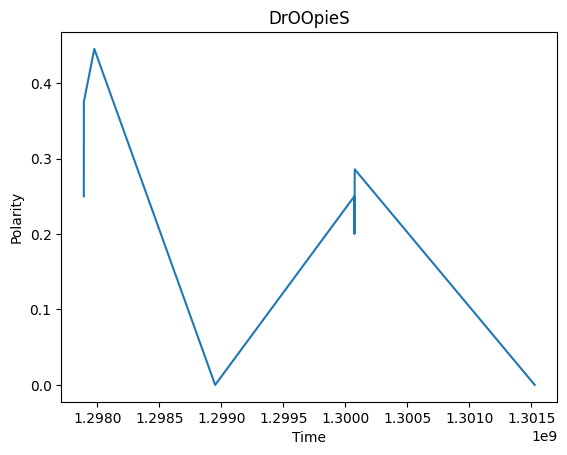

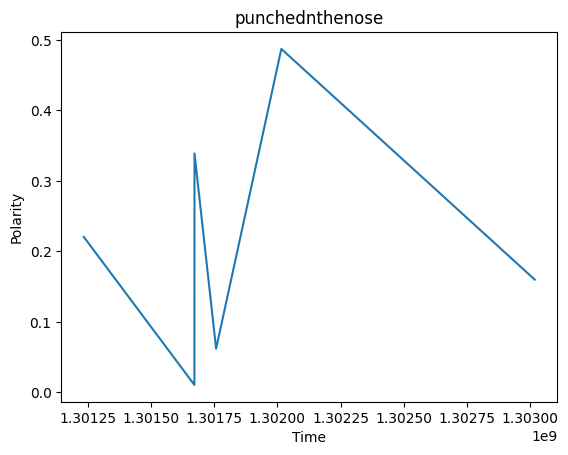

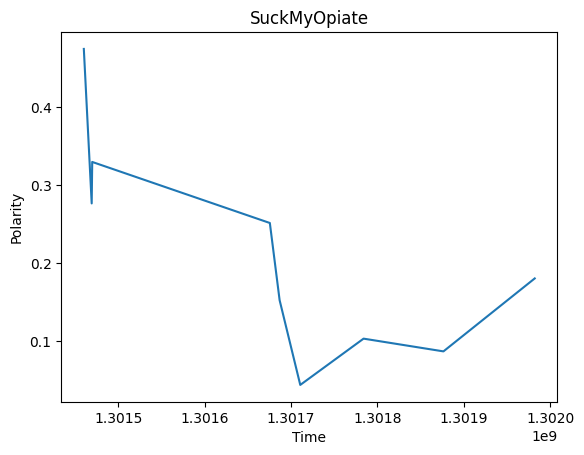

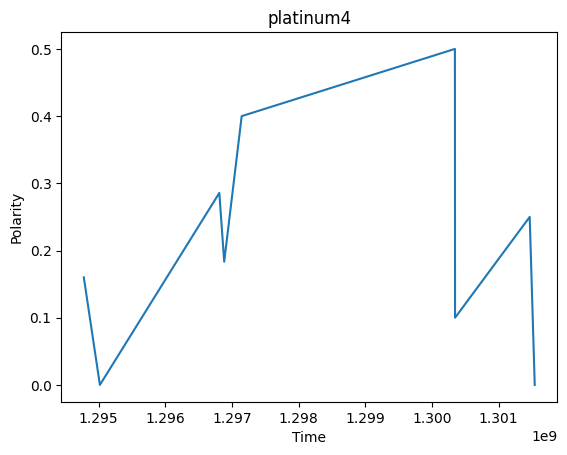

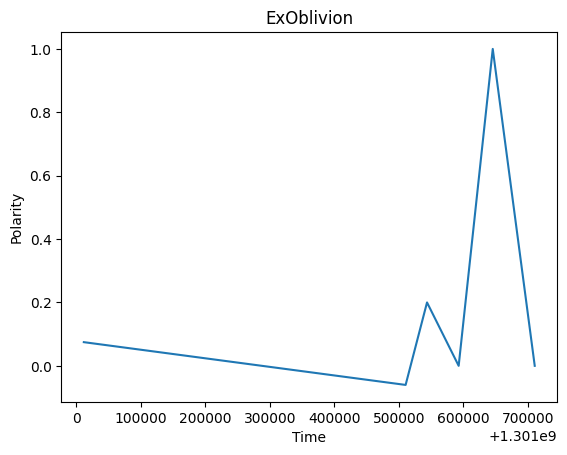

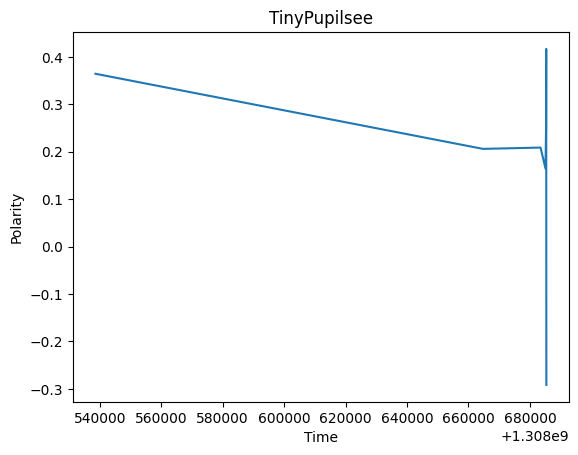

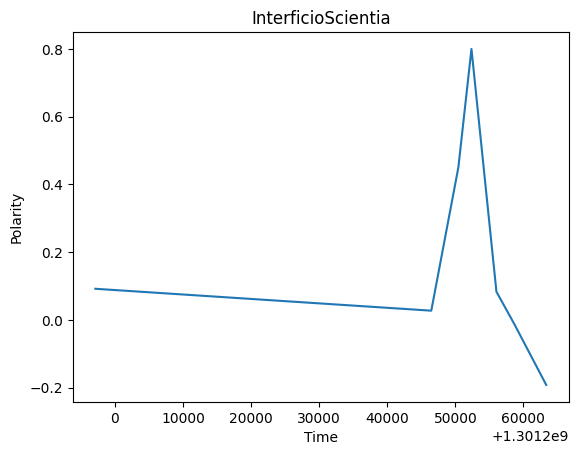

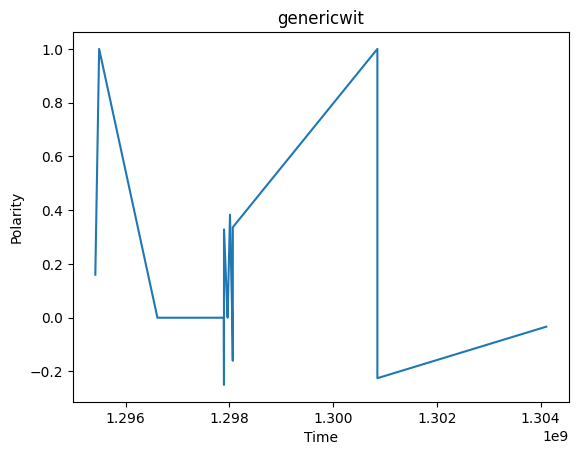

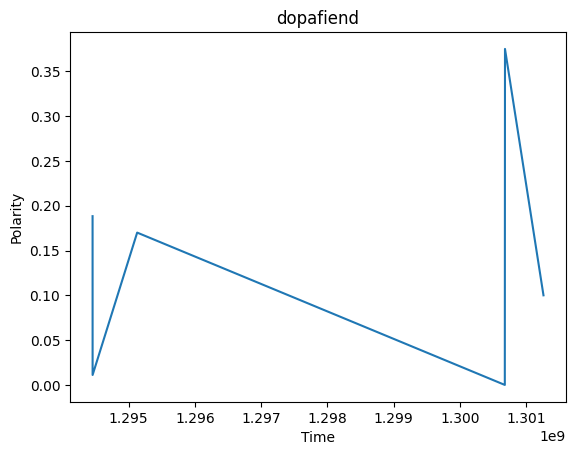

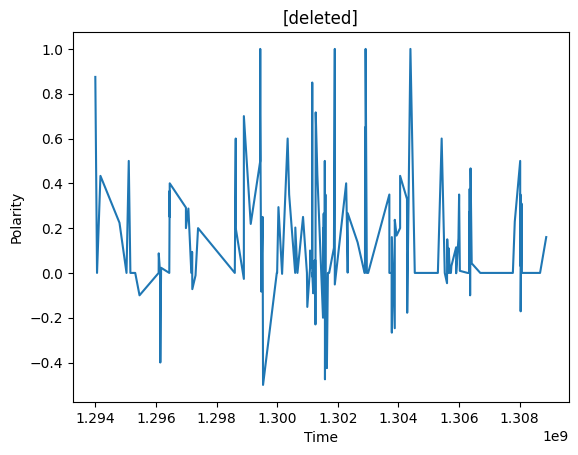

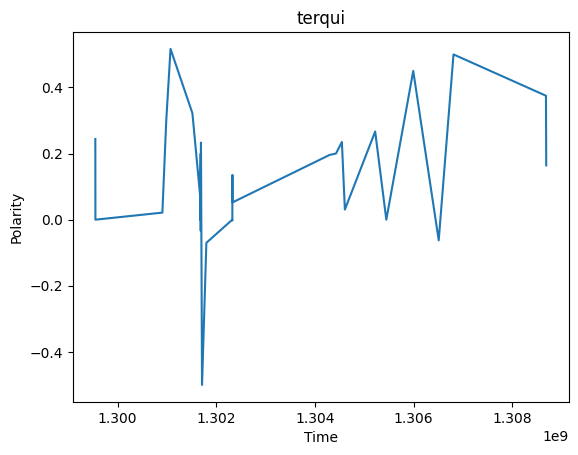

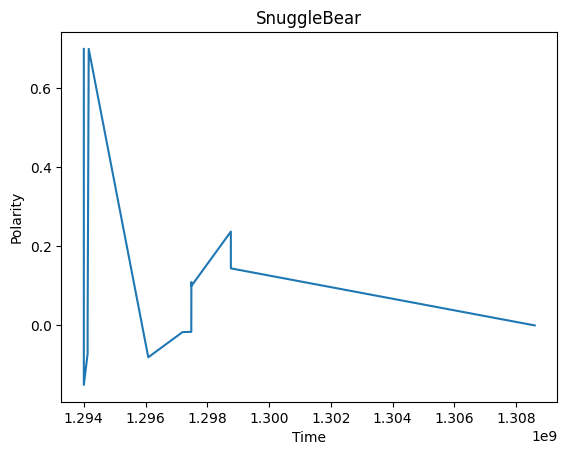

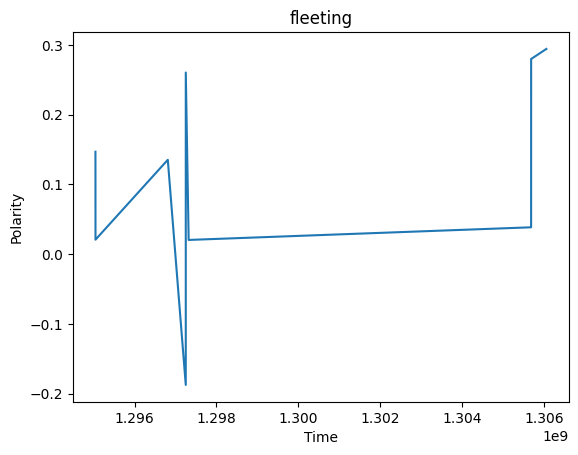

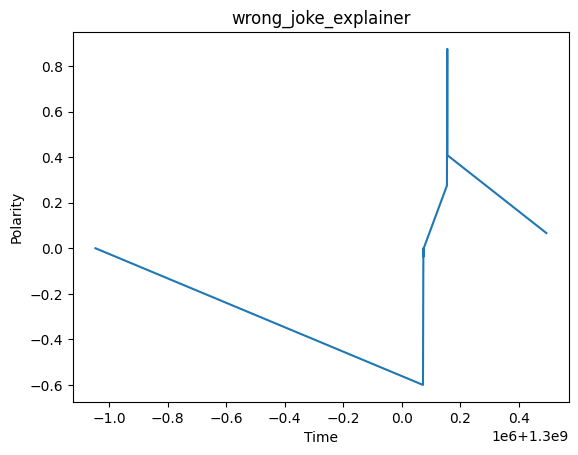

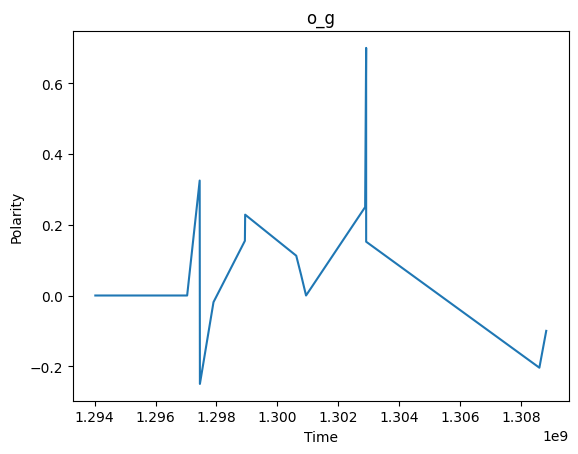

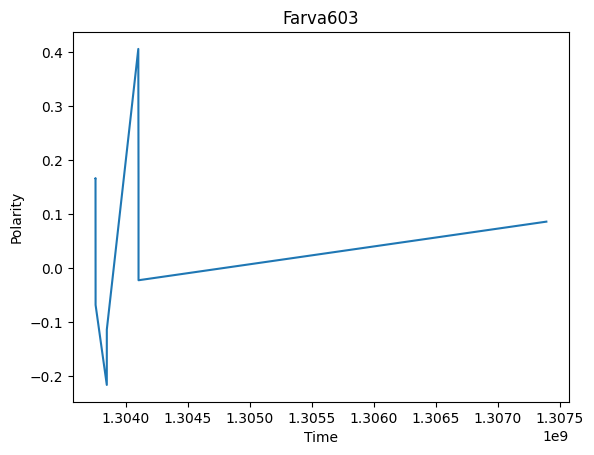

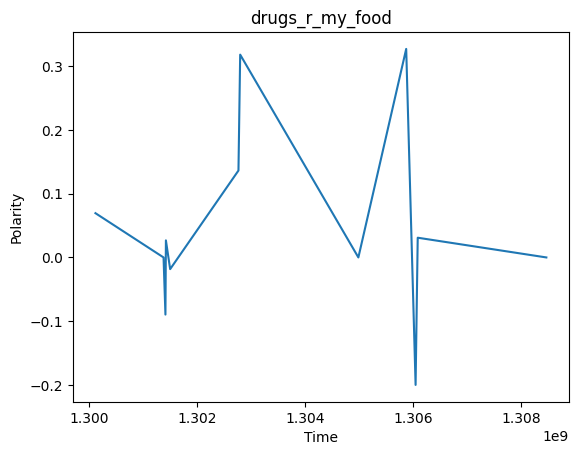

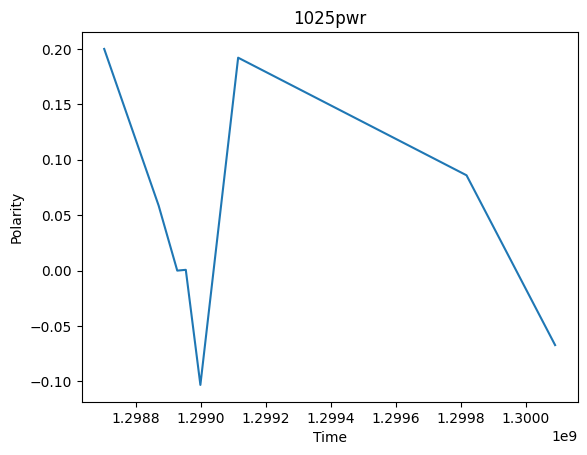

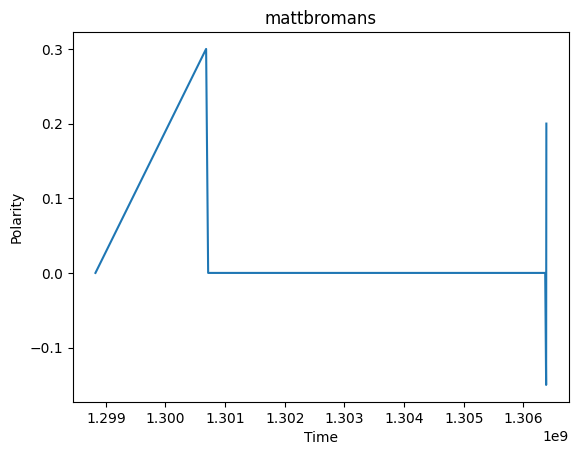

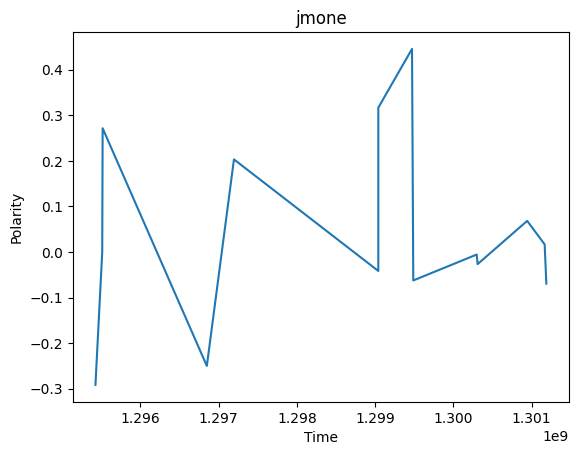

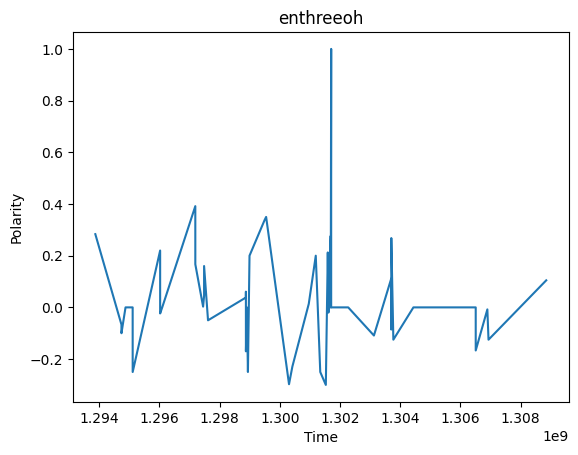

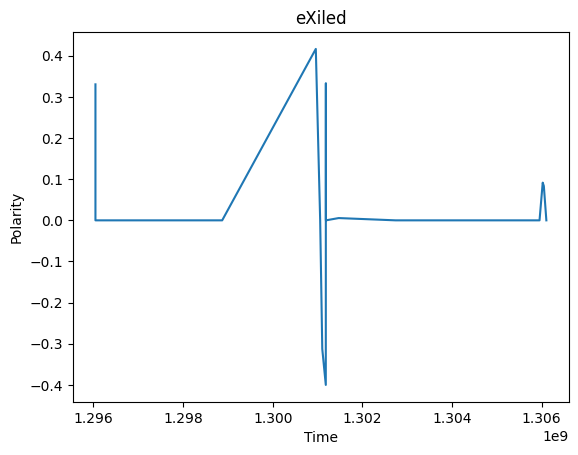

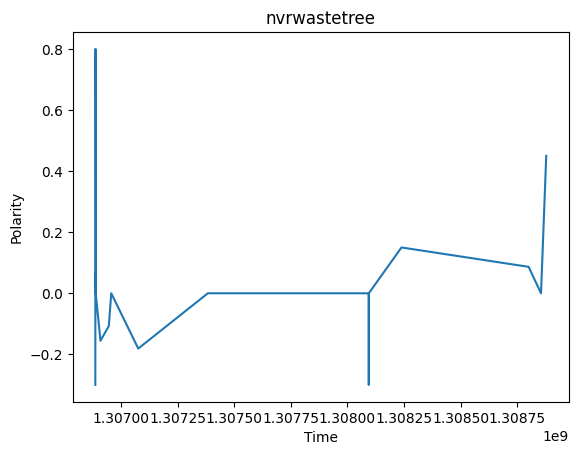

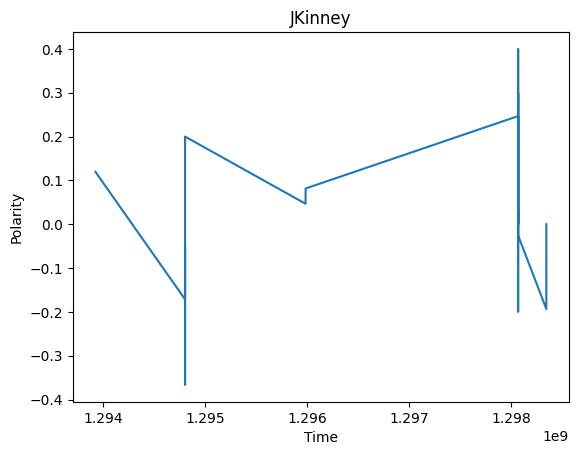

In [23]:
for i in range(25):
    plt.plot(df.loc[df_commenters.index[i] == df['author']]['created_utc'], df.loc[df_commenters.index[i] == df['author']]['polarity'])
    plt.xlabel('Time')
    plt.ylabel('Polarity')
    plt.title(df_commenters.index[i])
    plt.show()



